# Cálculo de potencial eléctrico por diferencias finitas (con controles interactivos)

Esta es una forma de resolver el potencial eléctrico por medio de diferencias finitas, incluyendo controles interactivos, para el caso de la placa cuadrada de lado L que se muestra seguidamente, dentro de la cual no existe una distribución de carga.

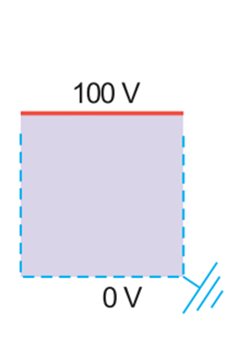

Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational Physics: Introductory Computational Science. Princeton: Princeton University Press.

# Bibliotecas necesarias

In [2]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
 
import numpy as np
import matplotlib.pyplot as plt

# Funciones para calcular el potencial aproximado en cualquier punto (x, y) la placa (adelante y atrás)

In [3]:
def AproxUXY_ad(uxy, pm, niter):
    '''Calcula el valor aproximado del potencial eléctrico en el punto (x, y)
 
    Parámetros de la función
    ------------------------
    uxy : matriz con los valores iniciales del potencial electrico en cada
           punto de la malla
    pm : número de puntos de la malla
    niter : número de iteraciones con que se calculará el potencial aproximado
            por diferencias finitas
 
    Salida de la función
    --------------------
    valorAproxUXY : matriz con los valores finales del potencial eléctrico
                    cada punto de la malla
    '''
 
    # Se realiza el cálculo iterativo del potencial aproximado en cada punto
    # de la malla iniciando en la esquina superior izquierda de esta
    for iter in range(niter):
      for m in range(1, pm-1, 1):
        for n in range(1, pm-1, 1):
          uxy[m, n] = 0.25*(uxy[m+1,n]+uxy[m-1,n]+uxy[m,n+1]+uxy[m,n-1])
    
    valorAproxUXY = uxy

    return valorAproxUXY

In [4]:
def AproxUXY_at(uxy, pm, niter):
    '''Calcula el valor aproximado del potencial eléctrico en el punto (x, y)
 
    Parámetros de la función
    ------------------------
    uxy : matriz con los valores iniciales del potencial electrico en cada
           punto de la malla
    pm : número de puntos de la malla
    niter : número de iteraciones con que se calculará el potencial aproximado
            por diferencias finitas
 
    Salida de la función
    --------------------
    valorAproxUXY : matriz con los valores finales del potencial eléctrico
                    cada punto de la malla
    '''
 
    # Se realiza el cálculo iterativo del potencial aproximado en cada punto
    # de la malla iniciando en la esquina superior izquierda de esta
    for iter in range(niter):
      for m in range(pm-2, 0, -1):
        for n in range(pm-2, 0, -1):
          uxy[m, n] = 0.25*(uxy[m+1,n]+uxy[m-1,n]+uxy[m,n+1]+uxy[m,n-1])
    
    valorAproxUXY = uxy

    return valorAproxUXY

# Cálculo del potencial aproximado y montaje de la presentación gráfica

In [5]:
def Grafico_interactivo(tipo, lado, potencial, niter):
  '''Calcula el valor aproximado del potencial eléctrico en una malla de puntos
  y lo 
 
  Parámetros de la función
  ------------------------
  lado : arista de la placa cuadrada sujeta al potencial eléctrico
  potencial : valor del potencial eléctrico en el lado superior de la placa
  niter : número de iteraciones con que se calculará el potencial aproximado
            por diferencias finitas
 
  Salida de la función
  --------------------
  Z : conjunto de valores del potencial aproximado en los puntos de la malla
      y gráfico 3D
  '''
 
  # Se define la malla de puntos para evaluar el potencial eléctrico
  puntosmalla = 30
  x = np.linspace(0, lado, puntosmalla)
  y = np.linspace(0, lado, puntosmalla)
  X, Y = np.meshgrid(x, y)
  
  # Se inicializa la matriz con los valores iniciaes del potencial en cada
  # punto de la malla
  uxyi = np.zeros((puntosmalla, puntosmalla), float)

  # Se establecen las condiciones de frontera para el caso particular de la
  # placa cuadrada
  for i in range(0, puntosmalla):
    uxyi[puntosmalla-1,i] = potencial

  # Se calcula el valor aproximado del potencial eléctrico en los puntos de
  # la malla y se asignan al eje Z
  if tipo == 'ad':
    Z = AproxUXY_ad(uxyi, puntosmalla, niter)
  else:
    Z = AproxUXY_at(uxyi, puntosmalla, niter)
 
  plt.figure(figsize=(10,6))
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x (m)')
  ax.set_ylabel('y (m)')
  ax.set_zlabel('U (V)')
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
  ax.set_title('Aproximacion potencial electrico en la placa')
  plt.show()
 
  return

# Interactividad con la presentación gráfica

In [6]:
y=interactive(Grafico_interactivo, tipo=['ad', 'at'], lado=widgets.IntSlider(min=5.0, max=10.0, step=1.0, value=5.0, description='L (m):'),
              potencial=widgets.IntSlider(min=25.0, max=150.0, step=25.0, value=25.0, description='U0 (V):'),
              niter=widgets.IntSlider(min=10, max=310, step=20, value=50, description='Iteraciones:'))
display(y)

interactive(children=(Dropdown(description='tipo', options=('ad', 'at'), value='ad'), IntSlider(value=5, descr…

# Diferencias entre el cálculo hacia adelante y hacia atrás

In [7]:
def diferencias_interactivo(lado, potencial, niter):
  '''Calcula el valor aproximado del potencial eléctrico en una malla de puntos
  y lo 
 
  Parámetros de la función
  ------------------------
  lado : arista de la placa cuadrada sujeta al potencial eléctrico
  potencial : valor del potencial eléctrico en el lado superior de la placa
  niter : número de iteraciones con que se calculará el potencial aproximado
            por diferencias finitas
 
  Salida de la función
  --------------------
  Z : conjunto de valores del potencial aproximado en los puntos de la malla
      y gráfico 3D
  '''
 
  # Se define la malla de puntos para evaluar el potencial eléctrico
  puntosmalla = 5
  x = np.linspace(0, lado, puntosmalla)
  y = np.linspace(0, lado, puntosmalla)
  X, Y = np.meshgrid(x, y)
  
  # Se inicializa la matriz con los valores iniciaes del potencial en cada
  # punto de la malla
  uxyi = np.zeros((puntosmalla, puntosmalla), float)

  # Se establecen las condiciones de frontera para el caso particular de la
  # placa cuadrada
  for i in range(0, puntosmalla):
    uxyi[puntosmalla-1,i] = potencial

  # Se calcula el valor aproximado del potencial eléctrico en los puntos de
  # la malla y se asignan al eje Z
  Z_ad = AproxUXY_ad(uxyi, puntosmalla, niter)
  Z_at = AproxUXY_at(uxyi, puntosmalla, niter)
  print(Z_ad)
  print(Z_at)
  diff_Z = Z_ad - Z_at
  print(diff_Z)

  plt.figure(figsize=(10,6))
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x (m)')
  ax.set_ylabel('y (m)')
  ax.set_zlabel('U (V)')
  ax.plot_surface(X, Y, diff_Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
  ax.set_title('Aproximacion potencial electrico en la placa')
  plt.show()
 
  return

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.78571429  2.45535714  1.78571429  0.        ]
 [ 0.          4.6875      6.25        4.6875      0.        ]
 [ 0.         10.71428571 13.16964286 10.71428571  0.        ]
 [25.         25.         25.         25.         25.        ]]
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.78571429  2.45535714  1.78571429  0.        ]
 [ 0.          4.6875      6.25        4.6875      0.        ]
 [ 0.         10.71428571 13.16964286 10.71428571  0.        ]
 [25.         25.         25.         25.         25.        ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


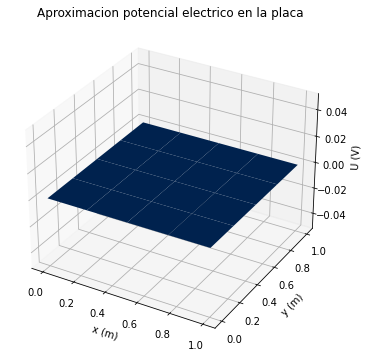

In [8]:
diferencias_interactivo(1, 25, 30)